In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
modelpath= 'fruit-type-model-save/cnn_fruitstype_model.h5'
weightpath= 'fruit-type-model-save/cnn_fruitstype_weight.h5'

In [3]:
model = keras.models.load_model(modelpath)

2022-08-07 13:56:05.979289: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-08-07 13:56:05.979457: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ankan
2022-08-07 13:56:05.979489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ankan
2022-08-07 13:56:05.979762: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.65.1
2022-08-07 13:56:05.979875: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-08-07 13:56:05.979902: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.48.7 does not match DSO version 515.65.1 -- cannot find working devices in this configuration
2022-08-07 13:56:05.980896: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binar

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [5]:
model.load_weights(weightpath)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
parent_dir = 'fruit_data_type_processed'
test_data_dir = f'{parent_dir}/Test'
w,h = (224, 224)
test_generator = ImageDataGenerator()
testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(w, h),
                                             class_mode='binary',
#                                              classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 3691 images belonging to 2 classes.


In [31]:
num_of_test_samples = testgen.n

In [32]:
import numpy as np

In [56]:
from sklearn.metrics import classification_report, confusion_matrix


Y_pred = model.predict_generator(testgen, num_of_test_samples)
# y_pred = np.argmax(Y_pred, axis=1)
y_pred = np.reshape(Y_pred, (1, -1))[0].astype('int32')
print(len(y_pred))
print(len(testgen.classes))
print('Confusion Matrix')
cf_matrix = confusion_matrix(testgen.classes, y_pred)
print(cf_matrix)
print('Classification Report')
target_names = ['Bad', 'Good']
print(classification_report(testgen.classes, y_pred, target_names=target_names))


/tmp/ipykernel_65295/1939640211.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testgen, num_of_test_samples)


3691
3691
Confusion Matrix
[[1235  123]
 [ 200 2133]]
Classification Report
              precision    recall  f1-score   support

         Bad       0.86      0.91      0.88      1358
        Good       0.95      0.91      0.93      2333

    accuracy                           0.91      3691
   macro avg       0.90      0.91      0.91      3691
weighted avg       0.91      0.91      0.91      3691



In [87]:
import pandas as pd
cf_df = pd.DataFrame(cf_matrix, columns = testgen.class_indices.keys())
cf_df

,Bad,Good
0,1235,123
1,200,2133


In [88]:
import seaborn as sns

categories = ['Bad', 'Good']

<AxesSubplot:>

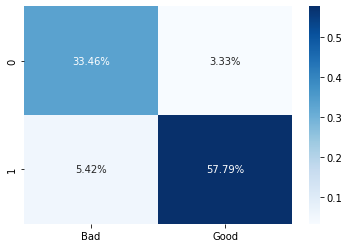

In [89]:
sns.heatmap(cf_df/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

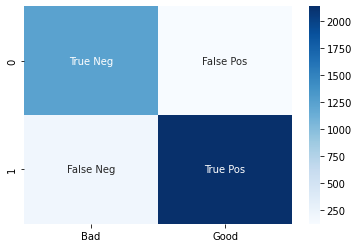

In [90]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_df, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

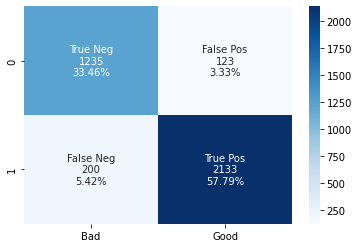

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_df, annot=labels, fmt='', cmap='Blues')

In [76]:
type(cf_matrix)

numpy.ndarray

In [77]:
cf_matrix

array([[1235,  123],
       [ 200, 2133]])

In [86]:
import pandas as pd
df = pd.DataFrame(cf_matrix, columns = testgen.class_indices.keys())
df

,Bad,Good
0,1235,123
1,200,2133
